# Primjer 1. Analiza kretanja cijena akcija kompanija

## Kretanje cijene akcija Apple-a (2000-2024)

### Instaliranje potrebnih 

In [ ]:
!pip install yfinance pandas matplotlib

### Python code

[*********************100%***********************]  1 of 1 completed


Prvih pet redova podataka:
Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2000-01-03  0.842150  0.846382  0.765035  0.789016  535796800
2000-01-04  0.771149  0.832276  0.761274  0.814408  512377600
2000-01-05  0.782433  0.831806  0.774910  0.780552  778321600
2000-01-06  0.714723  0.805004  0.714723  0.798421  767972800
2000-01-07  0.748578  0.759864  0.718485  0.726008  460734400


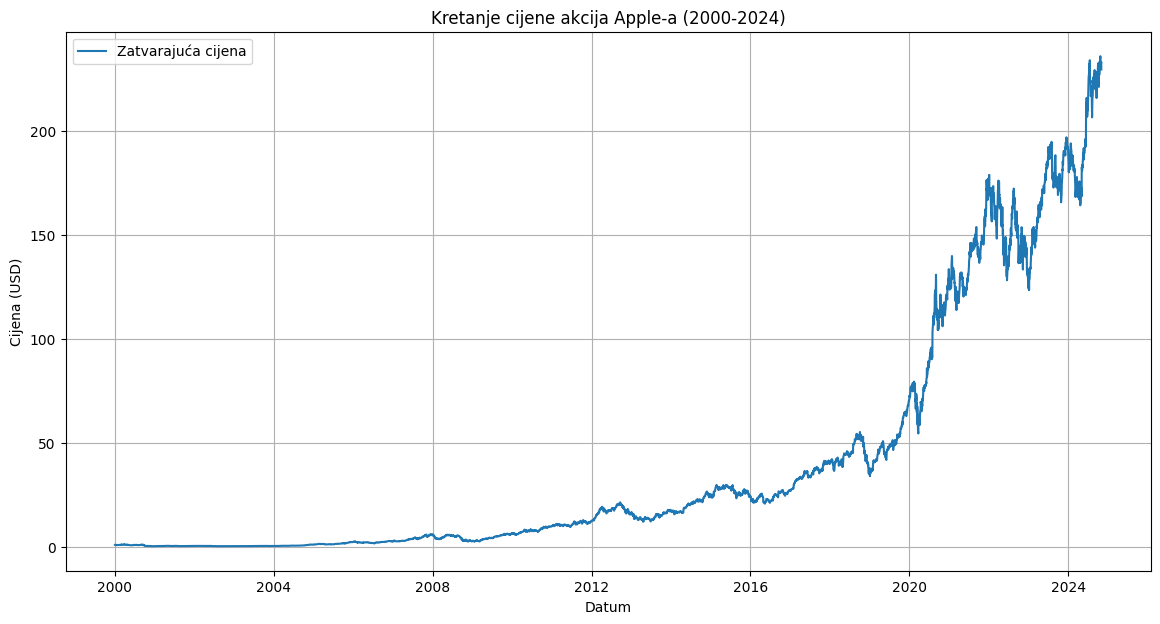

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Preuzimanje podataka o akcijama kompanije Apple (AAPL)
symbol = 'AAPL'  # Tiker za Apple
data = yf.download(symbol, start='2000-01-01', end='2024-10-31')

# Provera prvih nekoliko redova podataka
print("Prvih pet redova podataka:")
print(data.head())

# Računanje  dnevnih povrata(returns)
data['Daily Return'] = data['Close'].pct_change()

# Računanje kumulativnog povrata
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

# Prikaz grafikona
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Zatvarajuća cijena')
plt.title('Kretanje cijene akcija Apple-a (2000-2024)')
plt.xlabel('Datum')
plt.ylabel('Cijena (USD)')
plt.legend()
plt.grid(True)
plt.show()

## Kretanje javnog duga SAD (2000-2023)

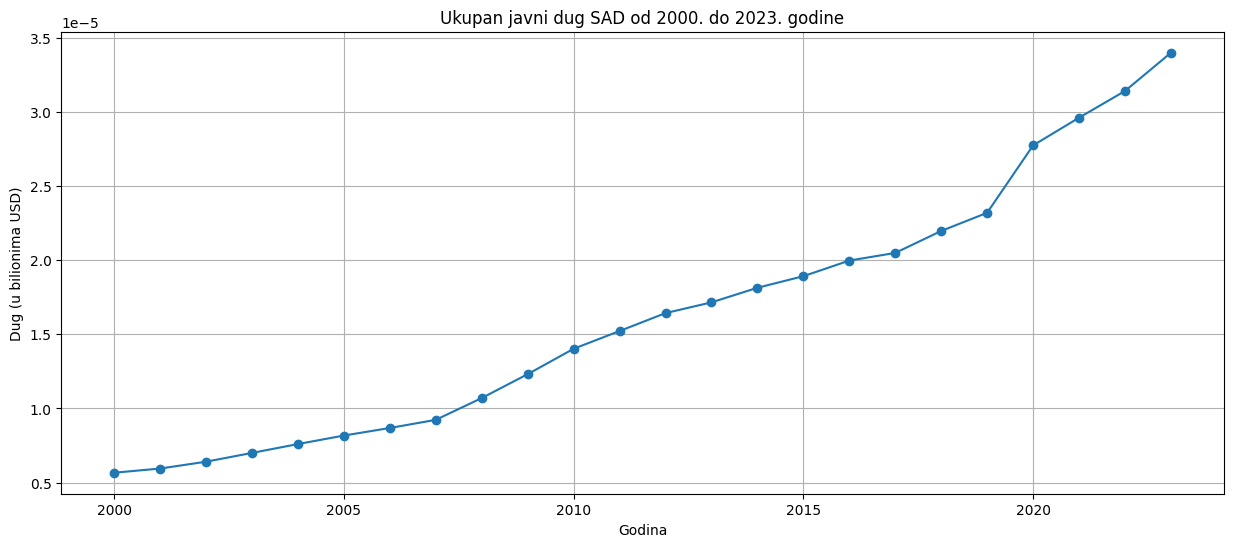

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

# Definisanje početnog i krajnjeg datuma
start_date = '2000-01-01'
end_date = '2023-10-31'

# Preuzimanje podataka o javnom dugu SAD
debt = web.DataReader('GFDEBTN', 'fred', start_date, end_date)

# Konvertovanje indeksa u datetime format
debt.index = pd.to_datetime(debt.index)

# Resampliranje podataka na godišnji nivo
annual_debt = debt.resample('YE').last()

# Prikaz podataka
plt.figure(figsize=(15,6))
plt.plot(annual_debt.index.year, annual_debt['GFDEBTN'] / 1e12, marker='o', linestyle='-')
plt.title('Ukupan javni dug SAD od 2000. do 2023. godine')
plt.xlabel('Godina')
plt.ylabel('Dug (u bilionima USD)')
plt.grid(True)
plt.show()

## Uporedni grafikon kretanja cijena akcija i javnog duga SAD

[*********************100%***********************]  2 of 2 completed


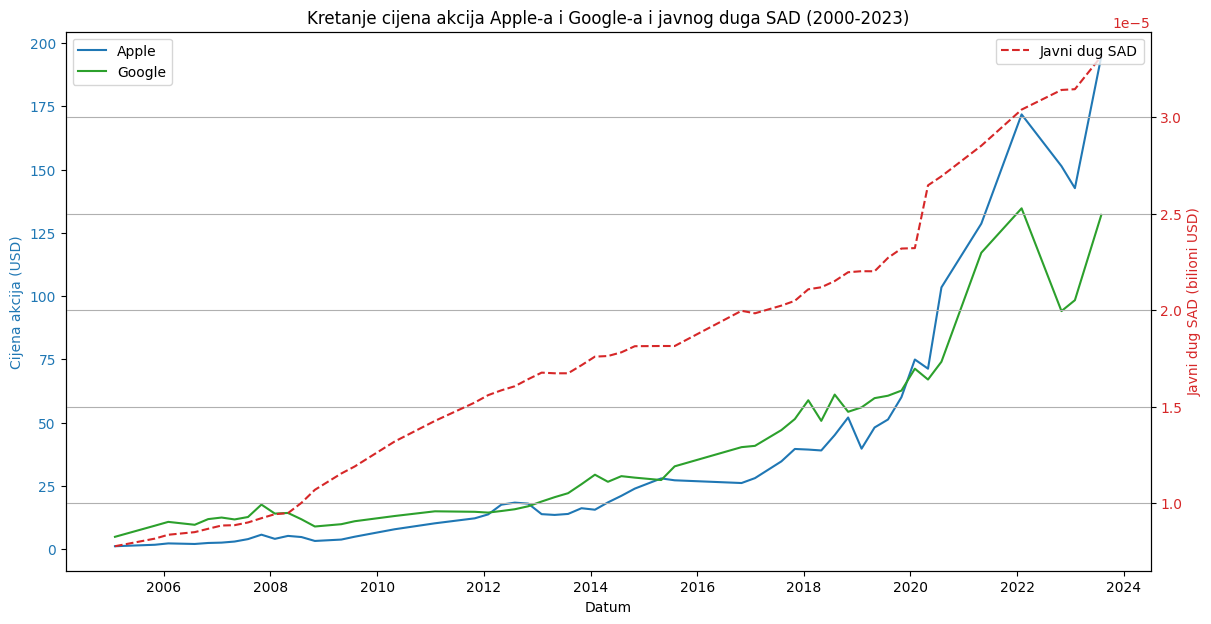

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as web

# Definisanje početnog i krajnjeg datuma
start_date = '2000-01-01'
end_date = '2023-10-31'  

# Definisanje simbola kompanija
symbols = ['AAPL', 'GOOGL']

# Preuzimanje podataka o cijenama dionica
stock_data = yf.download(symbols, start=start_date, end=end_date)['Close']

# Uklanjanje vremenske zone iz indeksa stock_data
stock_data.index = stock_data.index.tz_localize(None)

# Preuzimanje podataka o javnom dugu SAD
debt_data = web.DataReader('GFDEBTN', 'fred', start_date, end_date)

# Konvertovanje indeksa u datetime format (ako već nije)
debt_data.index = pd.to_datetime(debt_data.index)

# Resampliranje podataka o dugu na mjesečni nivo (posljednji dostupni dan u mjesecu)
debt_monthly = debt_data.resample('ME').last()

# Spajanje podataka
data_combined = pd.concat([stock_data, debt_monthly], axis=1).dropna()

# Kreiranje grafikona
fig, ax1 = plt.subplots(figsize=(14,7))

# Prva y-osa (lijeva): cijene akcije
ax1.set_xlabel('Datum')
ax1.set_ylabel('Cijena akcija (USD)', color='tab:blue')
ax1.plot(data_combined.index, data_combined['AAPL'], label='Apple', color='tab:blue')
ax1.plot(data_combined.index, data_combined['GOOGL'], label='Google', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Druga y-osa (desna): javni dug
ax2 = ax1.twinx()  # Dvostruka y-osa
ax2.set_ylabel('Javni dug SAD (bilioni USD)', color='tab:red')
ax2.plot(data_combined.index, data_combined['GFDEBTN'] / 1e12, label='Javni dug SAD', color='tab:red', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Naslov i mreža
plt.title('Kretanje cijena akcija Apple-a i Google-a i javnog duga SAD (2000-2023)')
plt.grid(True)
plt.show()